In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ff_energy.simulations.plots import plot_rdf_exp, plot_rdf_from_file


# from utils import 

plt.style.use(['science','ieee',])



In [2]:
jobpath = "/home/boittier/pcbach/sims3/mdcm/water/k350/dynamics.log"
NSAVC = 1000
dt = 0.0002

In [3]:
papermill_job = """papermill ../templates/sim_template.ipynb ../out_notebooks/{logkey}.ipynb -k pycharmm -p jobpath \
 "{path}" -p NSAVC {NSAVC} -p dt {dt}

jupyter nbconvert --to webpdf --no-input out_{logkey}.ipynb 
mv out_{logkey}.ipynb ../out_pdfs
"""

#  Make the bash files for generating reports

In [4]:
sim_paths = list(Path("/home/boittier/pcbach/")
                 .glob("sims*/*/water/*/dynamics.log"))

In [5]:
for sp in sim_paths:
    path = sp
    n_dyna = len(list(sp.parents[0].glob("*dyna*dcd")))
    if n_dyna > 1:
        path = str(path)
        logkey = "_".join(path[path.find("sim"):].split("/")[:-1])
        print(logkey, n_dyna)
        
        lk = logkey.split("_")
        
        if lk[1] == "shake":
            dt = 0.002
            nsavc = 1000
        else:
            dt = 0.0002
            nsavc = 1000
        
        pm = papermill_job.format(path=path,
                    logkey=logkey,
                    NSAVC=nsavc,
                    dt=dt)
        
        with open(f"../in_scripts/{logkey}_pm.sh", "w") as f:
            f.write(pm)
        
        
        

sims_shake_water_k300 61
sims_shake_water_k225 41
sims_shake_water_k250 39
sims_shake_water_k275 41
sims_shake_water_k289 42
sims_shake_water_k325 39
sims_shake_water_k350 39
sims_optpc_water_k300 6
sims_optpc_water_k225 6
sims_optpc_water_k250 6
sims_optpc_water_k275 6
sims_optpc_water_k289 6
sims_optpc_water_k325 6
sims_optpc_water_k350 5
sims3_mdcm_water_k225 4
sims3_mdcm_water_k250 5
sims3_mdcm_water_k275 5
sims3_mdcm_water_k289 4
sims3_mdcm_water_k325 5
sims3_mdcm_water_k350 6
sims3_optpc_water_k225 27
sims3_optpc_water_k250 28
sims3_optpc_water_k275 28
sims3_optpc_water_k289 27
sims3_optpc_water_k325 24
sims3_optpc_water_k350 29
sims3_shake_water_k225 76
sims3_shake_water_k250 63
sims3_shake_water_k275 74
sims3_shake_water_k289 78
sims3_shake_water_k325 77
sims3_shake_water_k350 77
sims3_kmdcm_water_k225 4
sims3_kmdcm_water_k250 4
sims3_kmdcm_water_k275 4
sims3_kmdcm_water_k289 4
sims3_kmdcm_water_k325 4
sims3_kmdcm_water_k350 4
sims2_optpc_water_k225 5
sims2_optpc_water_k250 6
s

In [49]:
rdf_dfs = [pd.read_csv(_) for _ in list(Path("../out_csvs").glob("*.csv"))]

In [47]:
# rdf_dfs = dfs

In [52]:
rdf_keys = [_.name.strip("_rdf_rdf.csv").split("_")[1:] for _ in list(Path(".").glob("../out_csvs/*.csv"))]

In [79]:
rdf_keys

[['shake', 'water', 'k325'],
 ['mdcm', 'water', 'k325'],
 ['kmdcm', 'water', 'k275'],
 ['optpc', 'water', 'k225'],
 ['mdcm', 'water', 'k250'],
 ['optpc', 'water', 'k289'],
 ['kmdcm', 'water', 'k350'],
 ['shake', 'water', 'k250'],
 ['mdcm', 'water', 'k350'],
 ['kmdcm', 'water', 'k289'],
 ['mdcm', 'water', 'k275'],
 ['optpc', 'water', 'k275'],
 ['shake', 'water', 'k350'],
 ['optpc', 'water', 'k250'],
 ['shake', 'water', 'k289'],
 ['shake', 'water', 'k225'],
 ['kmdcm', 'water', 'k325'],
 ['optpc', 'water', 'k325'],
 ['kmdcm', 'water', 'k225'],
 ['mdcm', 'water', 'k225'],
 ['shake', 'water', 'k275'],
 ['mdcm', 'water', 'k289'],
 ['optpc', 'water', 'k350'],
 ['kmdcm', 'water', 'k250']]

In [102]:
colors = sns.color_palette("Set1")
cdict = {"mdcm":colors[1], "optpc":"k",
        "shake":colors[2],"kmdcm":colors[0]}

In [101]:
colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [100]:
# fig, axs = plt.subplots(2,1, gridspec_kw={"hspace":0,
#                                       "wspace":1}, 
#                         height_ratios=[3,.1],
#                         figsize=(3,3))

# for i, (k, df) in enumerate(zip(keys, dfs)):
#     if k[0] == "mdcm":
#         i = 2
#     if k[0] == "optpc":
#         i = 1
#     if k[0] == "shake":
#         i = 0
#     if k[0] == "kmdcm":
#         i = 3
        
#     axs[0].plot(df["r"], df["g(r)"]+i*2, 
#                c=cdict[k[0]],
#                 linewidth=1)
    
# for i in range(4):
#     plot_rdf_exp(axs[0], shift=i*2, lw=0.5)
    
# FONTSIZE = 23   
# axs[0].text(4.,8,"k-MDCM",
#             c=cdict["kmdcm"],
#            fontsize=FONTSIZE)  
# axs[0].text(4.,5.5,"MDCM",
#             c=cdict["mdcm"],
#            fontsize=FONTSIZE) 
# axs[0].text(4.,3.5,"PC",
#             c=cdict["optpc"],
#            fontsize=FONTSIZE) 
# axs[0].text(4.,1.5,"TIP3",
#             c=cdict["shake"],
#            fontsize=FONTSIZE) 
# # axs[0].grid()
# axs[0].axvline(2.7,linewidth=5,alpha=0.1)
# axs[0].axvline(4.33,linewidth=15,alpha=0.1)
# axs[0].axvline(6.6,linewidth=10,alpha=0.1)
# # axs[0].set_ylim(0,2)
# axs[0].set_xlim(2,8)
# # axs[0].set_

# axs[1].axis("off")
# axs[0].set_ylabel("$g(r)$ ", fontsize=20)
# axs[0].set_xlabel("$r$ [$\mathrm{\AA}$]", fontsize=20)

# plt.savefig("comp_rdf.pdf", bbox_inches="tight")

In [27]:
dfs = [pd.read_csv(_) for _ in list(Path(".").glob("*prop.csv"))]

In [28]:
keys = [_.name.strip("_prop.csv").split("_")[1:] for _ in list(Path(".").glob("*prop.csv"))]

In [29]:
keys

[['shake', 'water', 'k289'],
 ['mdcm', 'water', 'k350'],
 ['kmdcm', 'water', 'k289'],
 ['optpc', 'water', 'k225'],
 ['optpc', 'water', 'k225'],
 ['optpc', 'water', 'k350'],
 ['mdcm', 'water', 'k250'],
 ['mdcm', 'water', 'k275'],
 ['optpc', 'water', 'k275'],
 ['shake', 'water', 'k250'],
 ['optpc', 'water', 'k250'],
 ['kmdcm', 'water', 'k350'],
 ['shake', 'water', 'k250'],
 ['mdcm', 'water', 'k325'],
 ['optpc', 'water', 'k250'],
 ['kmdcm', 'water', 'k325'],
 ['optpc', 'water', 'k289'],
 ['shake', 'water', 'k325'],
 ['kmdcm', 'water', 'k250'],
 ['kmdcm', 'water', 'k225'],
 ['mdcm', 'water', 'k289'],
 ['shake', 'water', 'k275'],
 ['mdcm', 'water', 'k350'],
 ['shake', 'water', 'k289'],
 ['kmdcm', 'water', 'k275'],
 ['shake', 'water', 'k225'],
 ['mdcm', 'water', 'k225'],
 ['shake', 'water', 'k350'],
 ['shake', 'water', 'k275'],
 ['optpc', 'water', 'k325'],
 ['shake', 'water', 'k225']]

In [30]:
props = pd.concat(dfs)

props = pd.DataFrame(
    {"method": [_[0] for _ in keys],
     "temp.": [float(_[2][1:]) for _ in keys],
     "D": props["D"],
     "dens": props["dens"]
    }
)

In [31]:
water_D = """0 °C	273.15 K	1.130
10 °C	283.15 K	1.536
20 °C	293.15 K	2.022
25 °C	298.15 K	2.296
30 °C	303.15 K	2.590
40 °C	313.15 K	3.240
50 °C	323.15 K	3.968
60 °C	333.15 K	4.772
70 °C	343.15 K	5.646
80 °C	353.15 K	6.582
90 °C	363.15 K	7.578
100 °C	373.15 K	8.623
0 °C	273.15 K	1.130
10 °C	283.15 K	1.536
20 °C	293.15 K	2.022
25 °C	298.15 K	2.296
30 °C	303.15 K	2.590
40 °C	313.15 K	3.240
50 °C	323.15 K	3.968
60 °C	333.15 K	4.772
70 °C	343.15 K	5.646
80 °C	353.15 K	6.582
90 °C	363.15 K	7.578
100 °C	373.15 K	8.623
4 °C	277.15 K	1.27
10 °C	283.15 K	1.55
25 °C	298.15 K	2.30
45 °C	318.15 K	3.55
60 °C	333.15 K	4.70
15 °C	288.15 K	1.756
20 °C	293.15 K	2.023
25 °C	298.15 K	2.317
30 °C	303.15 K	2.616
15 °C	288.15 K	1.766
20 °C	293.15 K	2.025
25 °C	298.15 K	2.299
30 °C	303.15 K	2.597
35 °C	308.15 K	2.895
40 °C	313.15 K	3.222
45 °C	318.15 K	3.601
50 °C	323.15 K	3.983
56 °C	329.15 K	4.444
–30.65 °C	242.5 K	0.187
–28.75 °C	244.4 K	0.219
–26.85 °C	246.3 K	0.263
–24.95 °C	248.2 K	0.321
–23.15 °C	250.0 K	0.341
–21.35 °C	251.8 K	0.395
–19.15 °C	254.0 K	0.438
–17.35 °C	255.8 K	0.477
–14.45 °C	258.7 K	0.553
–11.65 °C	261.5 K	0.633
–9.45 °C	263.7 K	0.700
0.35 °C	273.5 K	1.05  
12.15 °C	285.3 K	1.58  
25.05 °C	298.2 K	2.23 """
water_D = [_.split("\t")[1:] for _ in water_D.split("\n")]

ks = []
ds = []

for K,D in water_D:
    K = float(K[:6])
    D = float(D)
    ks.append(K)
    ds.append(D)
    
D_exp = pd.DataFrame({"K": ks, "D": ds})
D_exp = D_exp.sort_values("K")

In [32]:
# D_exp

(250.0, 350.0)

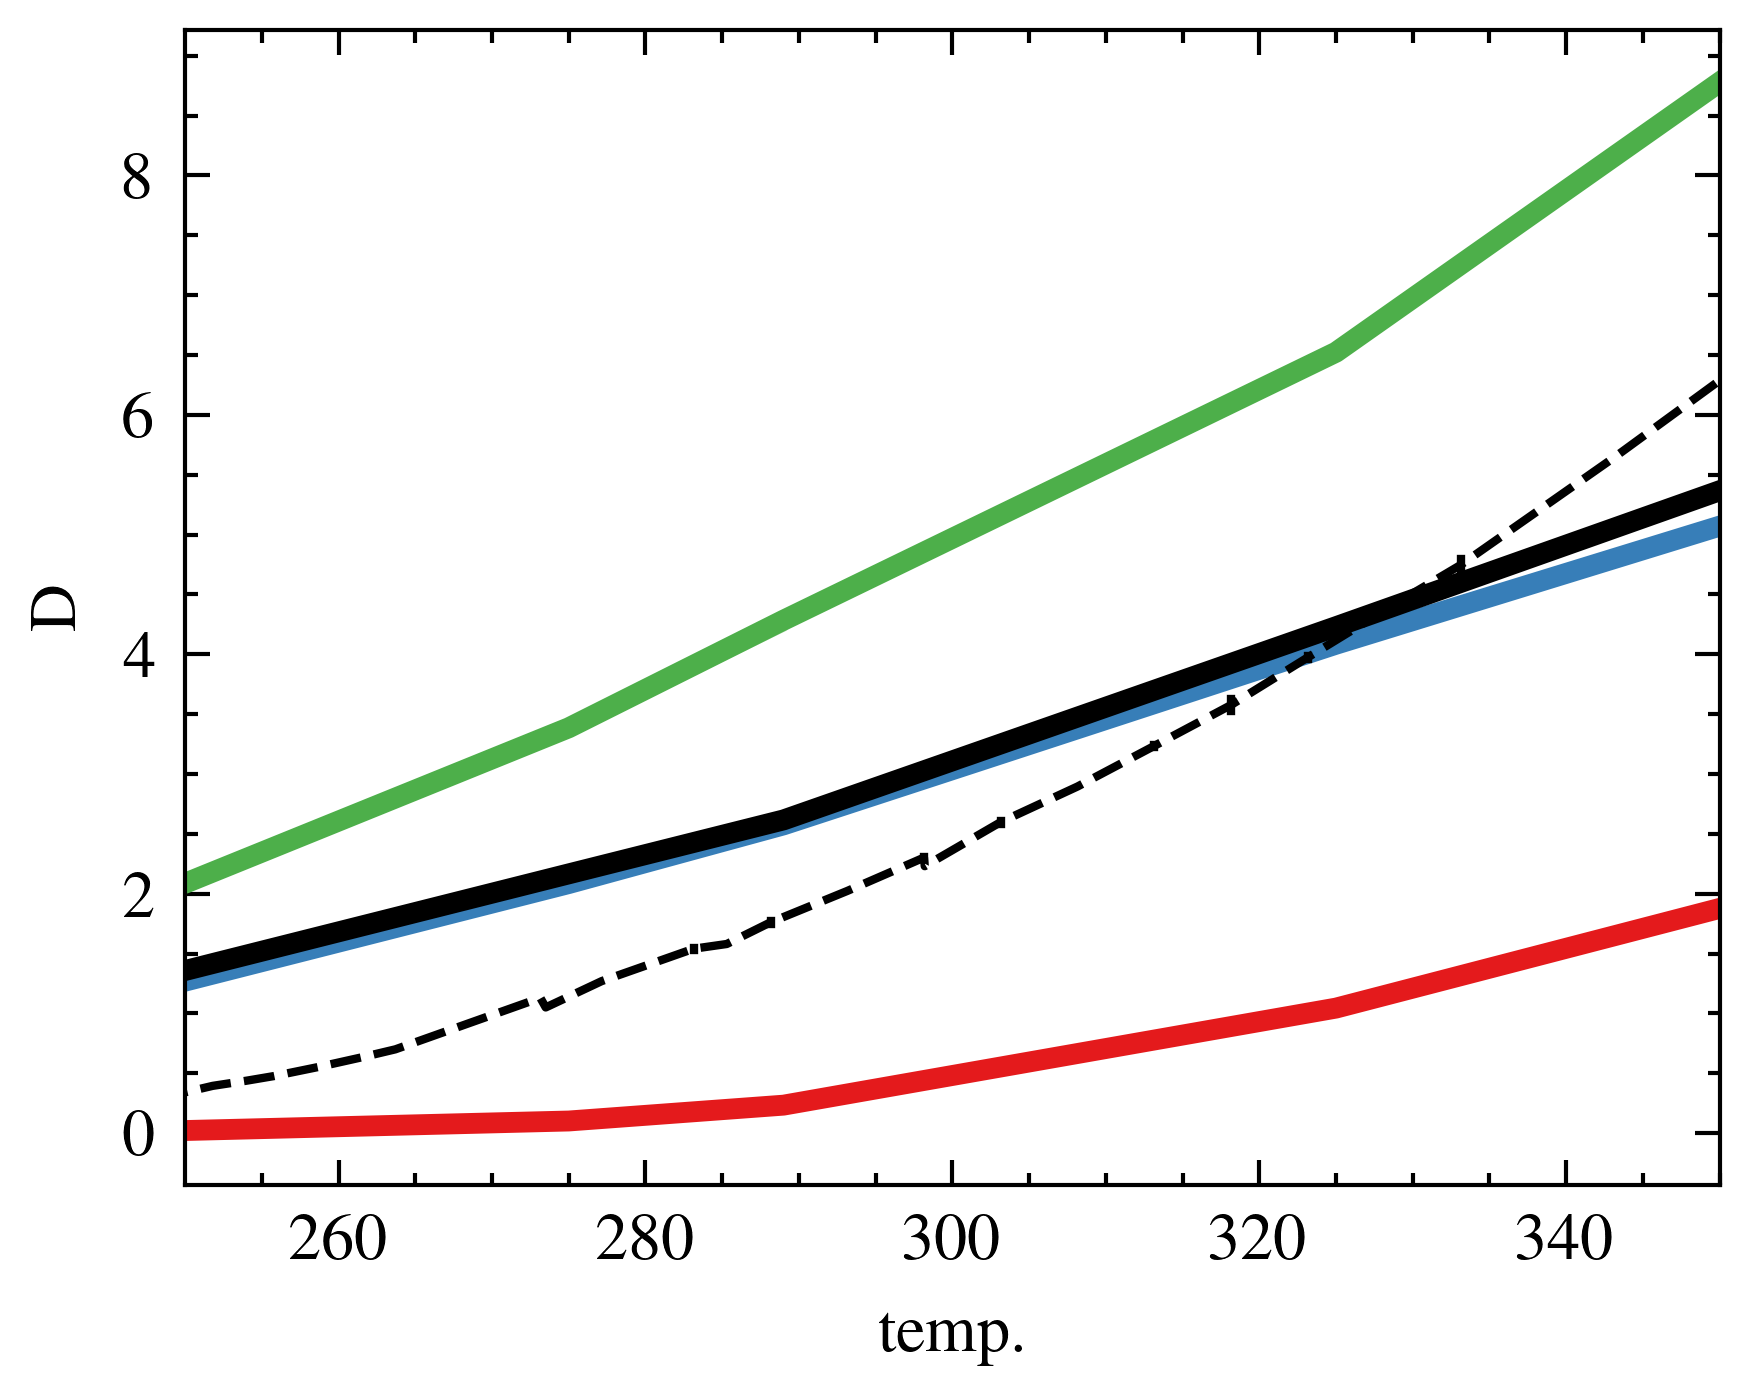

In [111]:

sns.lineplot(x = "temp.", y = "D", data=props, 
             hue="method", 
             palette=cdict,
            linewidth=2.5)
sns.lineplot(x = "K", y = "D", data= D_exp, 
             err_style="bars",
             linestyle="--",
             errorbar=("se", 2), c="k")


plt.legend([])

plt.xlim(250,350)

In [38]:
exp_densities = """°C	.0	.1	.2	.3	.4	.5	.6	.7	.8	.9
-30	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385
-20	0.99355	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385
-10	0.99817	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385	0.98385
0	0.999843	0.999850	0.999856	0.999863	0.999869	0.999875	0.999880	0.999886	0.999892	0.999897
1	0.999902	0.999907	0.999911	0.999916	0.999920	0.999925	0.999929	0.999932	0.999936	0.999940
2	0.999943	0.999946	0.999949	0.999952	0.999955	0.999957	0.999960	0.999962	0.999964	0.999965
3	0.999967	0.999969	0.999970	0.999971	0.999972	0.999973	0.999974	0.999974	0.999975	0.999975
4	0.999975	0.999975	0.999974	0.999974	0.999973	0.999973	0.999972	0.999971	0.999970	0.999968
5	0.999967	0.999965	0.999963	0.999961	0.999959	0.999957	0.999954	0.999952	0.999949	0.999946
6	0.999943	0.999940	0.999936	0.999933	0.999929	0.999925	0.999922	0.999917	0.999913	0.999909
7	0.999904	0.999900	0.999895	0.999890	0.999885	0.999879	0.999874	0.999868	0.999863	0.999857
8	0.999851	0.999845	0.999839	0.999832	0.999826	0.999819	0.999812	0.999805	0.999798	0.999791
9	0.999784	0.999776	0.999768	0.999761	0.999753	0.999745	0.999737	0.999728	0.999720	0.999711
10	0.999702	0.999694	0.999685	0.999675	0.999666	0.999657	0.999647	0.999638	0.999628	0.999618
11	0.999608	0.999598	0.999587	0.999577	0.999566	0.999556	0.999545	0.999534	0.999523	0.999512
12	0.999500	0.999489	0.999477	0.999466	0.999454	0.999442	0.999430	0.999417	0.999405	0.999393
13	0.999380	0.999367	0.999355	0.999342	0.999328	0.999315	0.999302	0.999288	0.999275	0.999261
14	0.999247	0.999233	0.999219	0.999205	0.999191	0.999176	0.999162	0.999147	0.999133	0.999118
15	0.999103	0.999087	0.999072	0.999057	0.999041	0.999026	0.999010	0.998994	0.998978	0.998962
16	0.998946	0.998930	0.998913	0.998897	0.998880	0.998863	0.998847	0.998830	0.998813	0.998795
17	0.998778	0.998761	0.998743	0.998725	0.998708	0.998690	0.998672	0.998654	0.998635	0.998617
18	0.998599	0.998580	0.998561	0.998543	0.998524	0.998505	0.998486	0.998467	0.998447	0.998428
19	0.998408	0.998389	0.998369	0.998349	0.998329	0.998309	0.998289	0.998269	0.998248	0.998228
20	0.998207	0.998186	0.998166	0.998145	0.998124	0.998103	0.998081	0.998060	0.998039	0.998017
21	0.997995	0.997974	0.997952	0.997930	0.997908	0.997886	0.997864	0.997841	0.997819	0.997796
22	0.997773	0.997751	0.997728	0.997705	0.997682	0.997659	0.997635	0.997612	0.997589	0.997565
23	0.997541	0.997518	0.997494	0.997470	0.997446	0.997422	0.997397	0.997373	0.997349	0.997324
24	0.997299	0.997275	0.997250	0.997225	0.997200	0.997175	0.997149	0.997124	0.997099	0.997073
25	0.997048	0.997022	0.996996	0.996970	0.996944	0.996918	0.996892	0.996866	0.996839	0.996813
26	0.996786	0.996760	0.996733	0.996706	0.996679	0.996652	0.996625	0.996598	0.996571	0.996543
27	0.996516	0.996488	0.996461	0.996433	0.996405	0.996377	0.996349	0.996321	0.996293	0.996264
28	0.996236	0.996207	0.996179	0.996150	0.996121	0.996093	0.996064	0.996035	0.996006	0.995976
29	0.995947	0.995918	0.995888	0.995859	0.995829	0.995799	0.995770	0.995740	0.995710	0.995680
30	0.99565	0.99562	0.99559	0.99556	0.99553	0.99550	0.99547	0.99544	0.99541	0.99537
31	0.99534	0.99531	0.99528	0.99525	0.99522	0.99519	0.99516	0.99512	0.99509	0.99506
32	0.99503	0.99500	0.99496	0.99493	0.99490	0.99487	0.99484	0.99480	0.99477	0.99474
33	0.99470	0.99467	0.99464	0.99461	0.99457	0.99454	0.99451	0.99447	0.99444	0.99441
34	0.99437	0.99434	0.99431	0.99427	0.99424	0.99420	0.99417	0.99414	0.99410	0.99407
35	0.99403	0.99400	0.99396	0.99393	0.99390	0.99386	0.99383	0.99379	0.99376	0.99372
36	0.99369	0.99365	0.99361	0.99358	0.99354	0.99351	0.99347	0.99344	0.99340	0.99337
37	0.99333	0.99329	0.99326	0.99322	0.99319	0.99315	0.99311	0.99308	0.99304	0.99300
38	0.99297	0.99293	0.99289	0.99286	0.99282	0.99278	0.99274	0.99271	0.99267	0.99263
39	0.99260	0.99256	0.99252	0.99248	0.99244	0.99241	0.99237	0.99233	0.99229	0.99225
40	0.99222	0.99218	0.99214	0.99210	0.99206	0.99202	0.99199	0.99195	0.99191	0.99187
41	0.99183	0.99179	0.99175	0.99171	0.99167	0.99163	0.99159	0.99156	0.99152	0.99148
42	0.99144	0.99140	0.99136	0.99132	0.99128	0.99124	0.99120	0.99116	0.99112	0.99108
43	0.99104	0.99100	0.99095	0.99091	0.99087	0.99083	0.99079	0.99075	0.99071	0.99067
44	0.99063	0.99059	0.99055	0.99050	0.99046	0.99042	0.99038	0.99034	0.99030	0.99025
45	0.99021	0.99017	0.99013	0.99009	0.99004	0.99000	0.98996	0.98992	0.98988	0.98983
46	0.98979	0.98975	0.98971	0.98966	0.98962	0.98958	0.98953	0.98949	0.98945	0.98941
47	0.98936	0.98932	0.98928	0.98923	0.98919	0.98915	0.98910	0.98906	0.98901	0.98897
48	0.98893	0.98888	0.98884	0.98879	0.98875	0.98871	0.98866	0.98862	0.98857	0.98853
49	0.98848	0.98844	0.98839	0.98835	0.98831	0.98826	0.98822	0.98817	0.98813	0.98808
50	0.98804	0.98799	0.98794	0.98790	0.98785	0.98781	0.98776	0.98772	0.98767	0.98763
51	0.98758	0.98753	0.98749	0.98744	0.98740	0.98735	0.98730	0.98726	0.98721	0.98716
52	0.98712	0.98707	0.98702	0.98698	0.98693	0.98688	0.98684	0.98679	0.98674	0.98670
53	0.98665	0.98660	0.98655	0.98651	0.98646	0.98641	0.98636	0.98632	0.98627	0.98622
54	0.98617	0.98613	0.98608	0.98603	0.98598	0.98593	0.98589	0.98584	0.98579	0.98574
55	0.98569	0.98564	0.98560	0.98555	0.98550	0.98545	0.98540	0.98535	0.98530	0.98525
56	0.98521	0.98516	0.98511	0.98506	0.98501	0.98496	0.98491	0.98486	0.98481	0.98476
57	0.98471	0.98466	0.98461	0.98456	0.98451	0.98446	0.98441	0.98436	0.98431	0.98426
58	0.98421	0.98416	0.98411	0.98406	0.98401	0.98396	0.98391	0.98386	0.98381	0.98376
59	0.98371	0.98366	0.98361	0.98355	0.98350	0.98345	0.98340	0.98335	0.98330	0.98325
60	0.98320	0.98314	0.98309	0.98304	0.98299	0.98294	0.98289	0.98283	0.98278	0.98273
61	0.98268	0.98263	0.98257	0.98252	0.98247	0.98242	0.98237	0.98231	0.98226	0.98221
62	0.98216	0.98210	0.98205	0.98200	0.98194	0.98189	0.98184	0.98179	0.98173	0.98168
63	0.98163	0.98157	0.98152	0.98147	0.98141	0.98136	0.98131	0.98125	0.98120	0.98115
64	0.98109	0.98104	0.98098	0.98093	0.98088	0.98082	0.98077	0.98071	0.98066	0.98061
65	0.98055	0.98050	0.98044	0.98039	0.98033	0.98028	0.98022	0.98017	0.98011	0.98006
66	0.98000	0.97995	0.97989	0.97984	0.97978	0.97973	0.97967	0.97962	0.97956	0.97951
67	0.97945	0.97940	0.97934	0.97929	0.97923	0.97918	0.97912	0.97906	0.97901	0.97895
68	0.97890	0.97884	0.97878	0.97873	0.97867	0.97861	0.97856	0.97850	0.97845	0.97839
69	0.97833	0.97828	0.97822	0.97816	0.97811	0.97805	0.97799	0.97794	0.97788	0.97782
70	0.97776	0.97771	0.97765	0.97759	0.97754	0.97748	0.97742	0.97736	0.97731	0.97725
71	0.97719	0.97713	0.97708	0.97702	0.97696	0.97690	0.97684	0.97679	0.97673	0.97667
72	0.97661	0.97655	0.97650	0.97644	0.97638	0.97632	0.97626	0.97620	0.97614	0.97609
73	0.97603	0.97597	0.97591	0.97585	0.97579	0.97573	0.97567	0.97562	0.97556	0.97550
74	0.97544	0.97538	0.97532	0.97526	0.97520	0.97514	0.97508	0.97502	0.97496	0.97490
75	0.97484	0.97478	0.97472	0.97466	0.97460	0.97454	0.97448	0.97442	0.97436	0.97430
76	0.97424	0.97418	0.97412	0.97406	0.97400	0.97394	0.97388	0.97382	0.97376	0.97370
77	0.97364	0.97358	0.97352	0.97345	0.97339	0.97333	0.97327	0.97321	0.97315	0.97309
78	0.97303	0.97297	0.97290	0.97284	0.97278	0.97272	0.97266	0.97260	0.97253	0.97247
79	0.97241	0.97235	0.97229	0.97223	0.97216	0.97210	0.97204	0.97198	0.97191	0.97185
80	0.97179	0.97173	0.97167	0.97160	0.97154	0.97148	0.97142	0.97135	0.97129	0.97123
81	0.97116	0.97110	0.97104	0.97098	0.97091	0.97085	0.97079	0.97072	0.97066	0.97060
82	0.97053	0.97047	0.97041	0.97034	0.97028	0.97022	0.97015	0.97009	0.97003	0.96996
83	0.96990	0.96983	0.96977	0.96971	0.96964	0.96958	0.96951	0.96945	0.96939	0.96932
84	0.96926	0.96919	0.96913	0.96906	0.96900	0.96893	0.96887	0.96881	0.96874	0.96868
85	0.96861	0.96855	0.96848	0.96842	0.96835	0.96829	0.96822	0.96816	0.96809	0.96803
86	0.96796	0.96790	0.96783	0.96776	0.96770	0.96763	0.96757	0.96750	0.96744	0.96737
87	0.96731	0.96724	0.96717	0.96711	0.96704	0.96698	0.96691	0.96684	0.96678	0.96671
88	0.96664	0.96658	0.96651	0.96645	0.96638	0.96631	0.96625	0.96618	0.96611	0.96605
89	0.96598	0.96591	0.96585	0.96578	0.96571	0.96565	0.96558	0.96551	0.96544	0.96538
90	0.96531	0.96524	0.96518	0.96511	0.96504	0.96497	0.96491	0.96484	0.96477	0.96470
91	0.96463	0.96457	0.96450	0.96443	0.96436	0.96430	0.96423	0.96416	0.96409	0.96402
92	0.96396	0.96389	0.96382	0.96375	0.96368	0.96361	0.96355	0.96348	0.96341	0.96334
93	0.96327	0.96320	0.96313	0.96306	0.96300	0.96293	0.96286	0.96279	0.96272	0.96265
94	0.96258	0.96251	0.96244	0.96237	0.96230	0.96224	0.96217	0.96210	0.96203	0.96196
95	0.96189	0.96182	0.96175	0.96168	0.96161	0.96154	0.96147	0.96140	0.96133	0.96126
96	0.96119	0.96112	0.96105	0.96098	0.96091	0.96084	0.96077	0.96070	0.96063	0.96056
97	0.96049	0.96042	0.96035	0.96027	0.96020	0.96013	0.96006	0.95999	0.95992	0.95985
98	0.95978	0.95971	0.95964	0.95957	0.95949	0.95942	0.95935	0.95928	0.95921	0.95914
99	0.95907	0.95899	0.95892	0.95885	0.95878	0.95871	0.95864	0.95856	0.95849	0.95842"""
exp_densities = [[float(x) for x in _.split("\t")[:2]] for _ in exp_densities.split("\n")[1:]]

In [39]:
exp_densities = np.array(exp_densities)
exp_densities[:,0] = exp_densities[:,0] + 273.15
exp_densities[:,1] = exp_densities[:,1] * 1000

In [40]:
exp_densities = pd.DataFrame(exp_densities, columns= ["K", "dens"])

(250.0, 350.0)

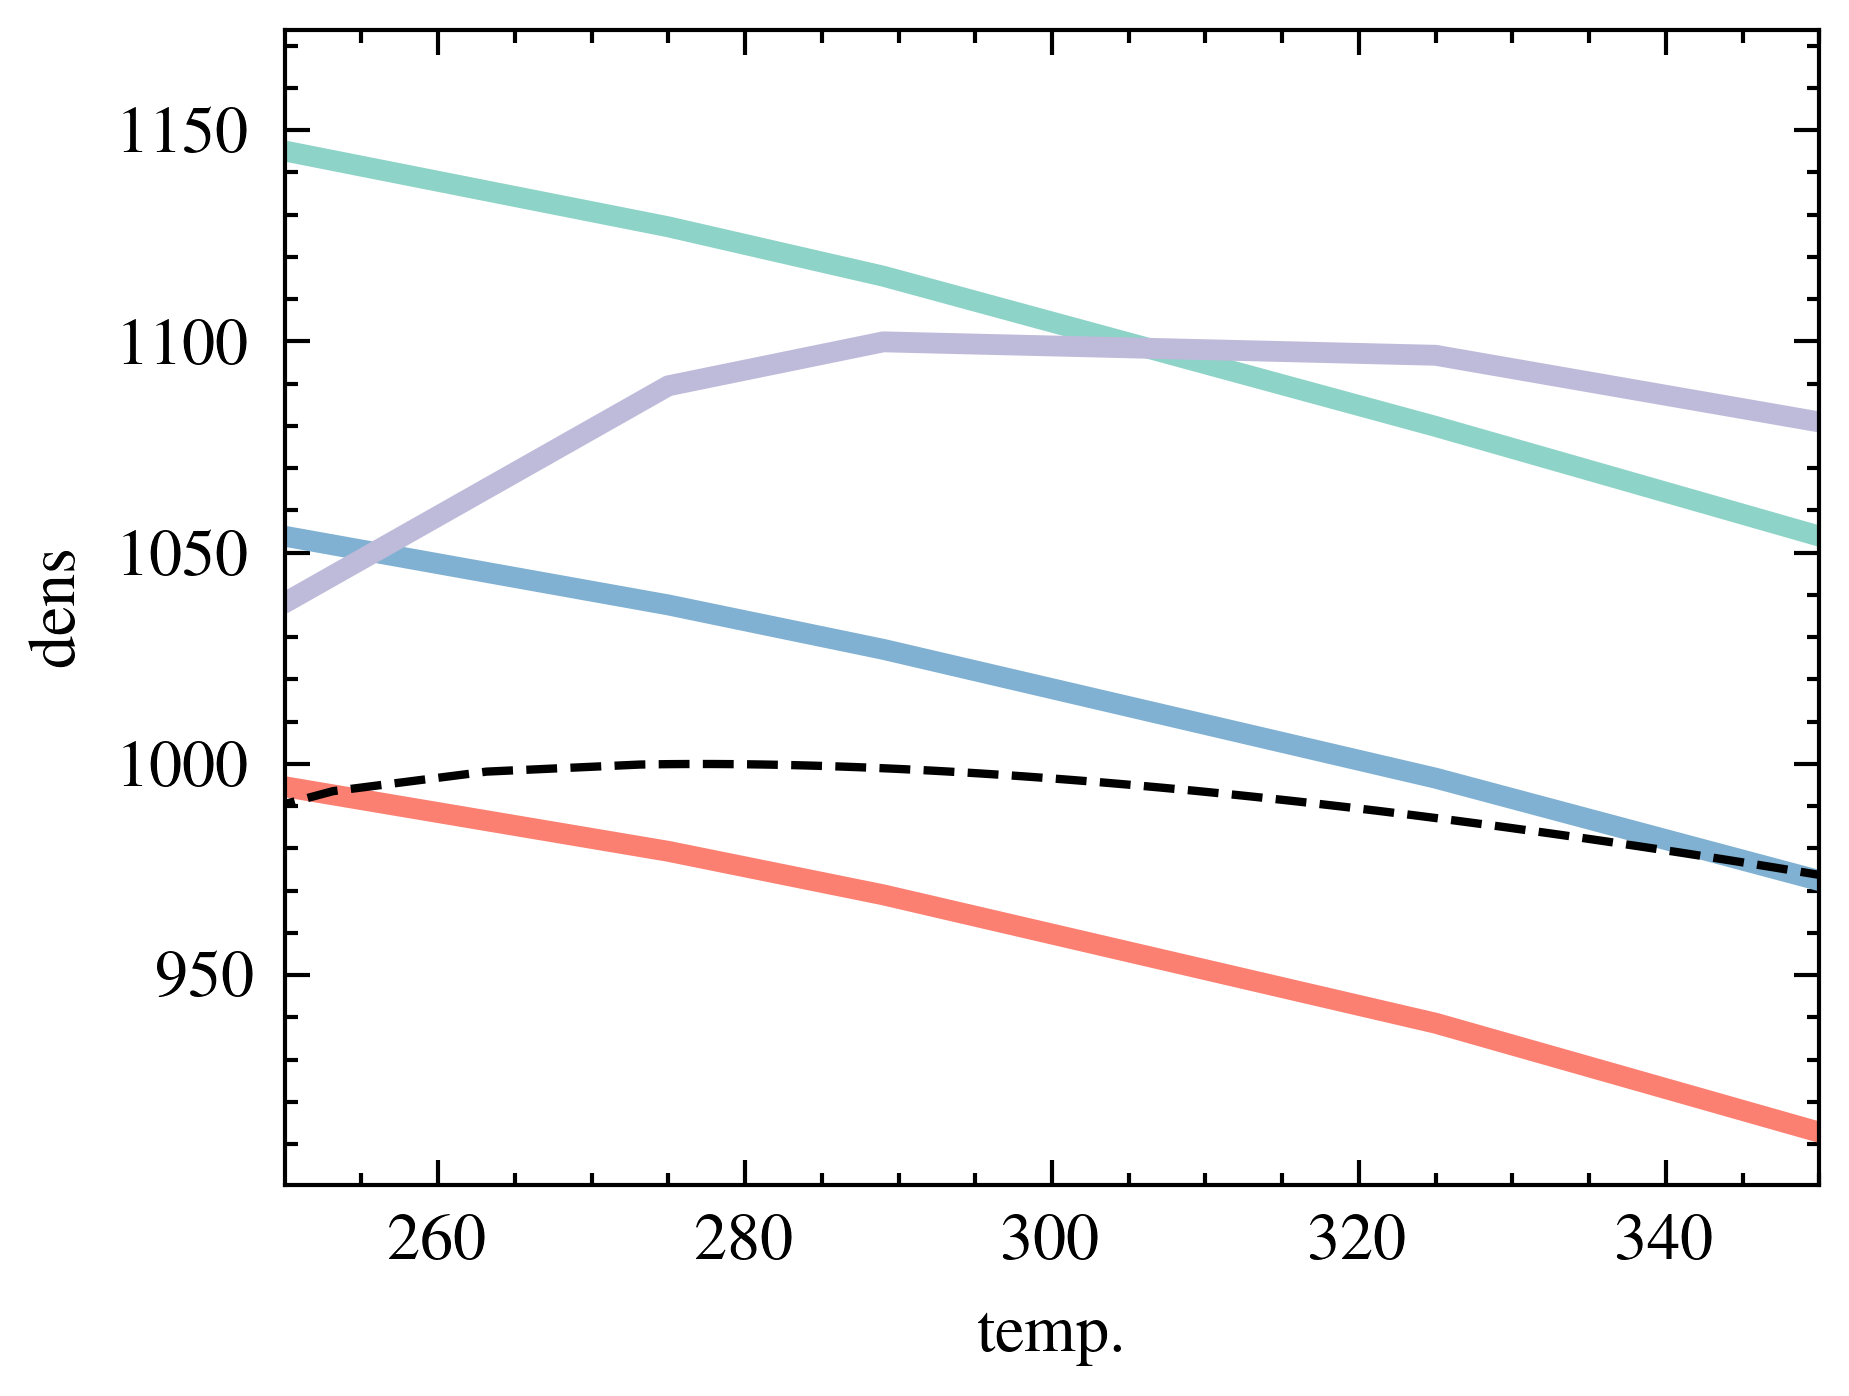

In [41]:
sns.lineplot(x = "temp.", y = "dens", data=props, hue="method",          
             palette=cdict,
            linewidth=2.5)
sns.lineplot(x = "K", y = "dens", data=exp_densities,
             linestyle="--",
             c="k")

plt.legend([])
plt.xlim(250,350)

# Combined Figure

In [46]:
# rdf_dfs

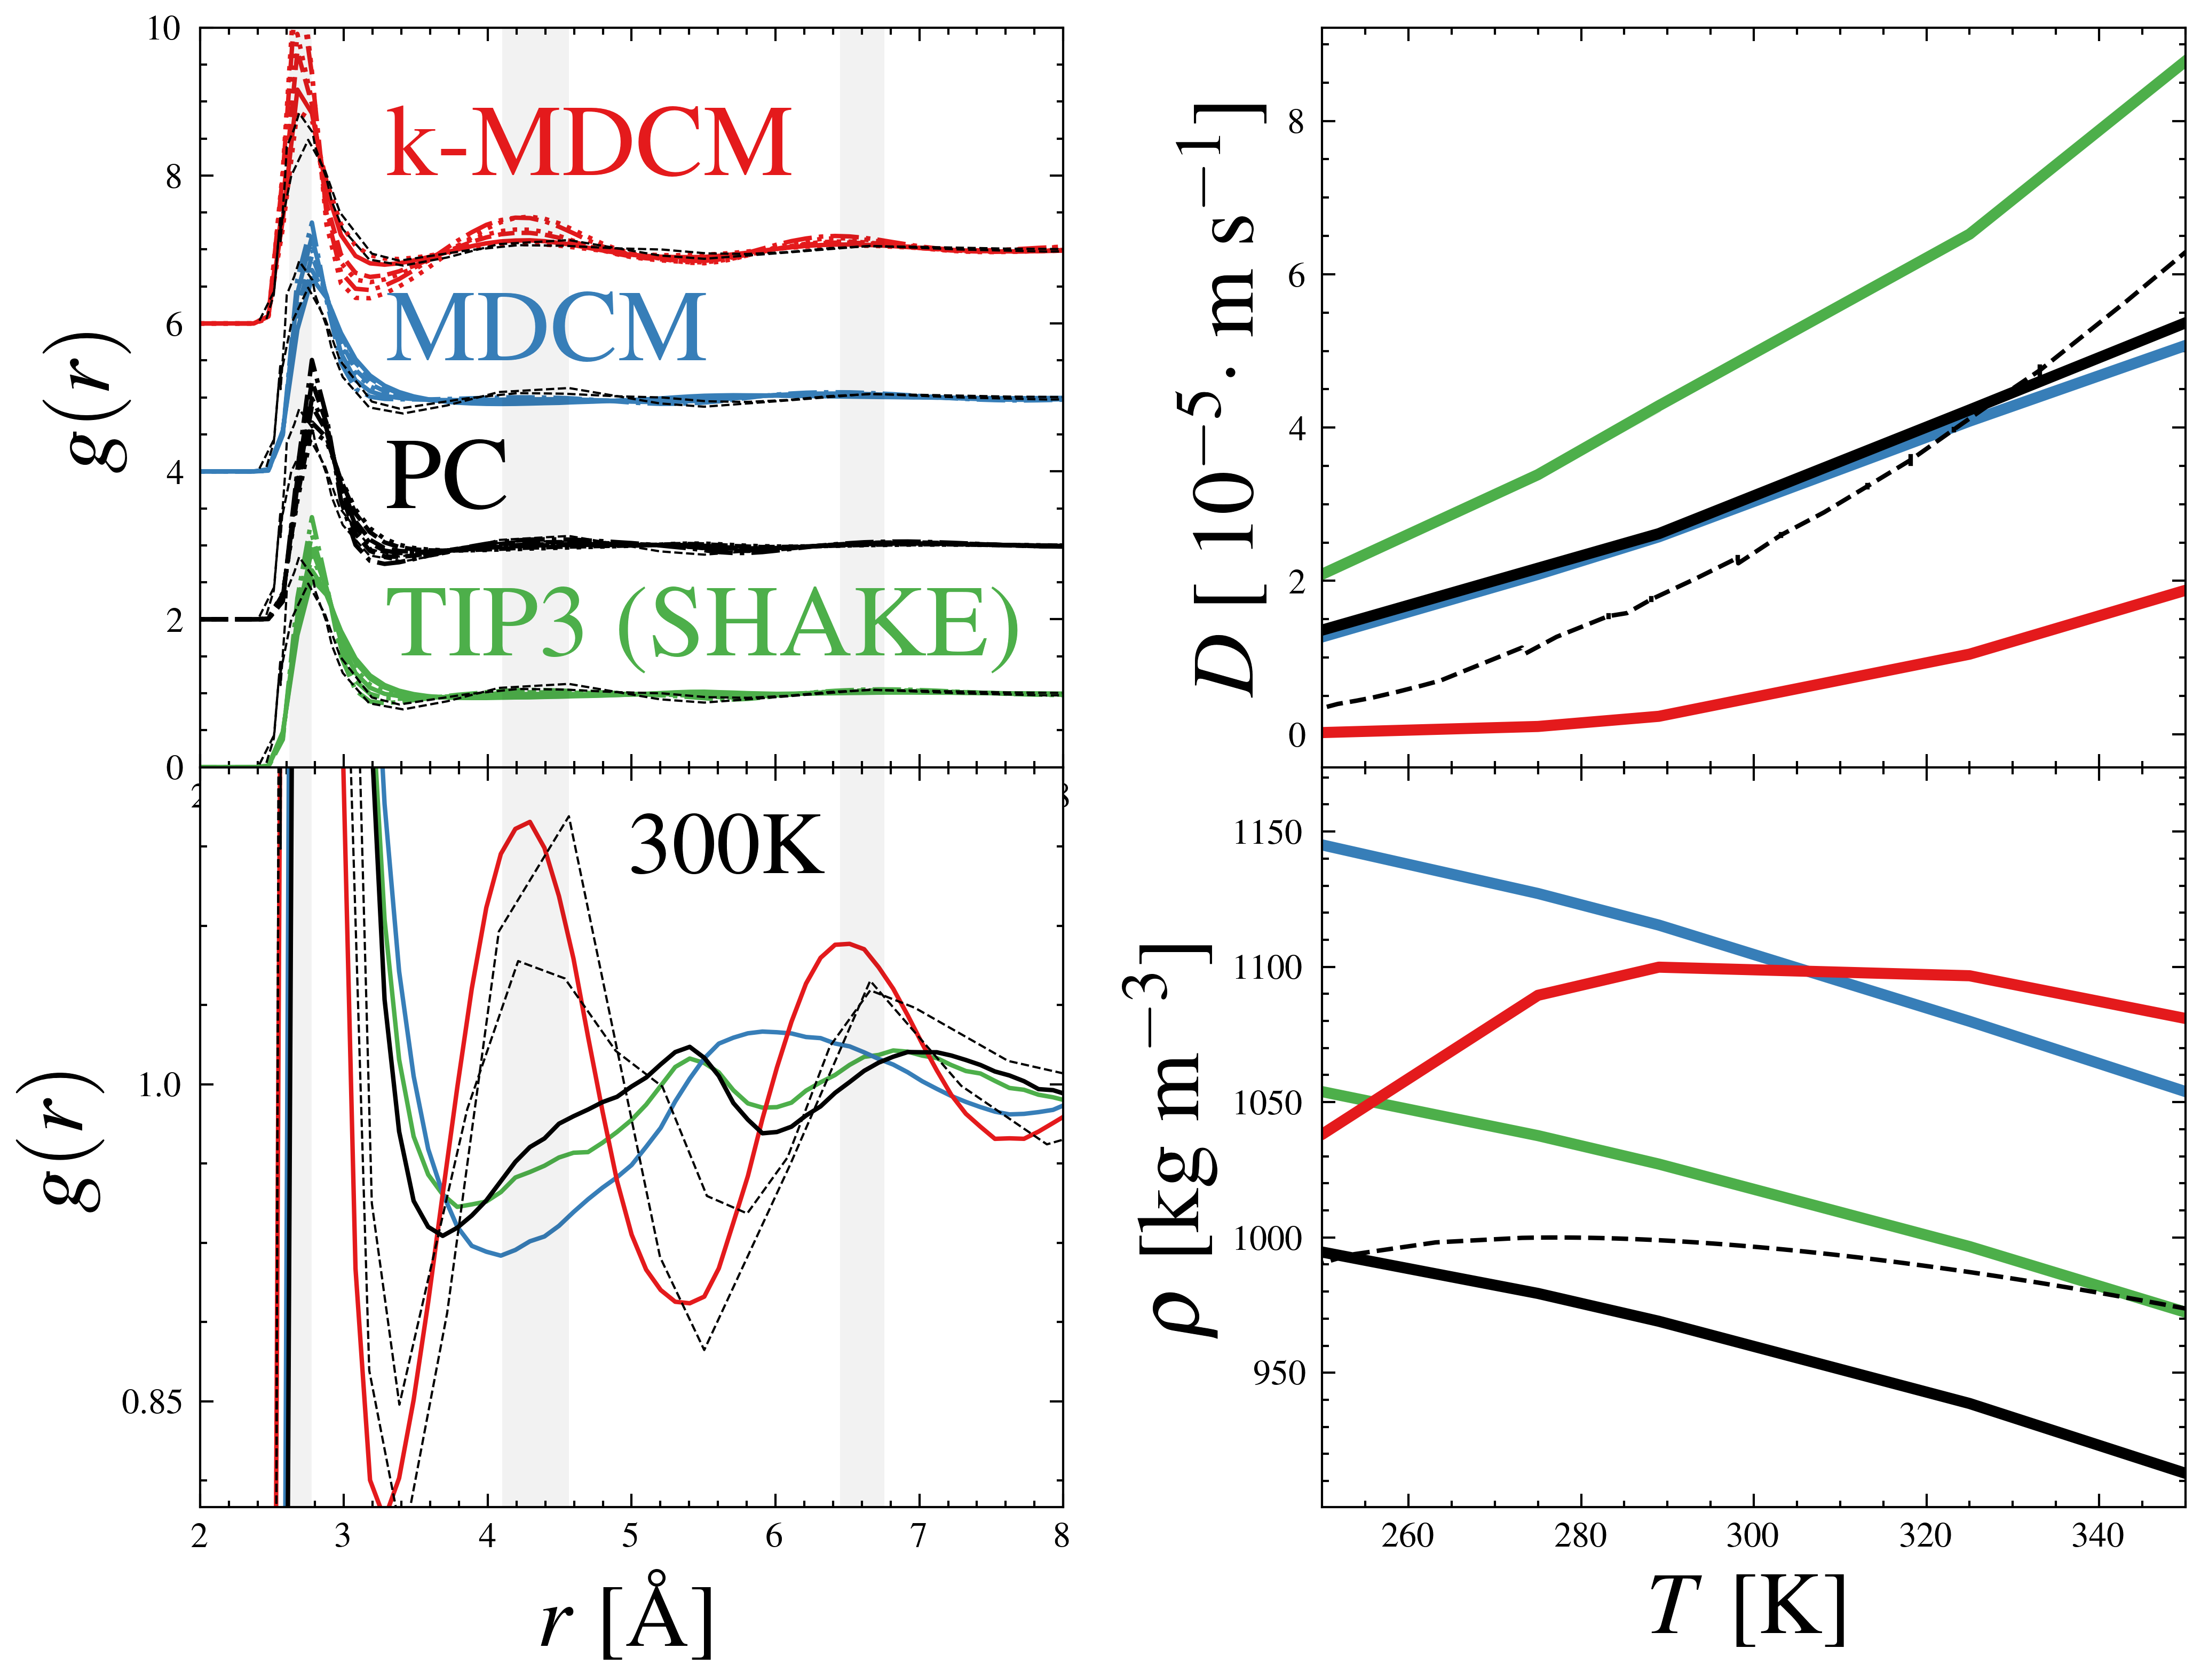

In [115]:
fig, axs = plt.subplots(2,2, gridspec_kw={"hspace":0,
                                      "wspace":0.3}, 
                        height_ratios=[2,2],
                        figsize=(8,6))

for i, (k, df) in enumerate(zip(rdf_keys, rdf_dfs)):
    if k[0] == "mdcm":
        i = 2
    if k[0] == "optpc":
        i = 1
    if k[0] == "shake":
        i = 0
    if k[0] == "kmdcm":
        i = 3
        
    axs[0,0].plot(df["r"], df["g(r)"]+i*2, 
               c=cdict[k[0]],
                linewidth=1)
    
    if k[2] == "k325":
        axs[1,0].plot(df["r"], df["g(r)"], 
                   c=cdict[k[0]],
                    linewidth=1,
                     linestyle="-")
        
plot_rdf_exp(axs[1,0], shift=0, lw=0.5)

for i in range(4):
    plot_rdf_exp(axs[0,0], shift=i*2, lw=0.5)
    
FONTSIZE = 23   
axs[0,0].text(3.3,8,"k-MDCM",
            c=cdict["kmdcm"],
           fontsize=FONTSIZE)  
axs[0,0].text(3.3,5.5,"MDCM",
            c=cdict["mdcm"],
           fontsize=FONTSIZE) 
axs[0,0].text(3.3,3.5,"PC",
            c=cdict["optpc"],
           fontsize=FONTSIZE) 
axs[0,0].text(3.3,1.5,"TIP3 (SHAKE)",
            c=cdict["shake"],
           fontsize=FONTSIZE) 
# axs[0].grid()
axs[0,0].axvline(2.7,linewidth=5,alpha=0.05)
axs[0,0].axvline(4.33,linewidth=15,alpha=0.051)
axs[0,0].axvline(6.6,linewidth=10,alpha=0.051)
axs[1,0].axvline(2.7,linewidth=5,alpha=0.05)
axs[1,0].axvline(4.33,linewidth=15,alpha=0.051)
axs[1,0].axvline(6.6,linewidth=10,alpha=0.051)
# axs[0].set_ylim(0,2)
axs[0,0].set_xlim(2,8)
axs[0,0].set_ylim(0,10)
axs[1,0].set_yticks([0.85, 1.], [0.85, 1.])
# axs[0,0].set_xticklabels(["", 2, 4, 6, 8])

# axs[0].set_

# axs[1,0].axis("off")
axs[0,0].set_ylabel("$g(r)$ ", fontsize=20)
axs[0,0].set_xlabel("$r$ [$\mathrm{\AA}$]", fontsize=20)
axs[1,0].set_ylabel("$g(r)$ ", fontsize=20)
axs[1,0].set_xlabel("$r$ [$\mathrm{\AA}$]", fontsize=20)
axs[1,0].set_ylim(.8,1.15)
axs[1,0].text(5, 1.1, "300K", fontsize=20)
axs[1,0].set_xlim(2,8)

sns.lineplot(x = "temp.", y = "dens", data=props, hue="method",          
             palette=cdict,
            linewidth=2.5,
            ax = axs[1,1])
sns.lineplot(x = "K", y = "dens", data=exp_densities,
             linestyle="--",
             c="k",            
             ax = axs[1,1])

axs[1,1].legend([])
axs[1,1].set_xlim(250,350)

axs[1,1].set_ylabel(r"$\rho$ [kg m$^{-3}$] ", fontsize=20)
axs[1,1].set_xlabel("$T$ [K]", fontsize=20)

sns.lineplot(x = "temp.", y = "D", data=props, 
             hue="method", 
             palette=cdict,
            linewidth=2.5,
             ax = axs[0,1])
sns.lineplot(x = "K", y = "D", data= D_exp, 
             err_style="bars",
             linestyle="--",
             errorbar=("se", 2), c="k",
             ax = axs[0,1])

axs[0,1].set_ylabel("$D$ [ $ 10^{-5} \cdot$ m s$^{-1}$] ", fontsize=20)
axs[0,1].set_xlabel("$T$ [K]", fontsize=20)

axs[0,1].legend([])

axs[0,1].set_xlim(250,350)


plt.savefig("comp.pdf", bbox_inches="tight")